<a href="https://colab.research.google.com/github/anukriti-khare/SentimentAnalysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [1]:
from google.colab import files

uploaded = files.upload()

Saving tweets_dataset.zip to tweets_dataset.zip


In [2]:
uploaded.keys()

dict_keys(['tweets_dataset.zip'])

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("tweets_dataset.zip", encoding="latin-1", header=None)

In [5]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [7]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.shape

(1600000, 6)

In [9]:
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [10]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


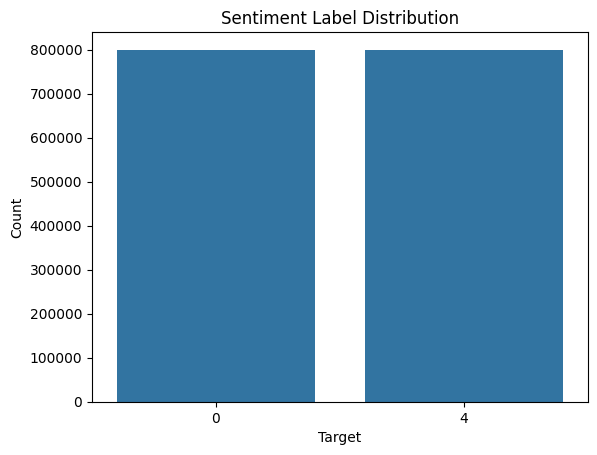

In [11]:
sns.countplot(x='target', data=df)
plt.title("Sentiment Label Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [12]:
df['clean_text'] = df['text'].str.lower()

In [13]:
df.head()

,target,id,date,flag,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [14]:
df['clean_text'] = df['text'].str.lower()

In [15]:
import re

df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

In [16]:
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'@\w+', '', x))

In [17]:
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'#', '', x))

In [18]:
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [19]:
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\d+', '', x))

In [20]:
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [21]:
df[['text', 'clean_text']].sample(5)

,text,clean_text
1239713,what is that? is it on urbandiktionary.com? lu...,what is that is it on urbandiktionarycom lulz ...
861966,"@kenloo Yeah Posterous is a really cool site, ...",yeah posterous is a really cool site i like th...
104138,@littlelizziev hey that's my goal too! Mine go...,hey thats my goal too mine got stolen in jan a...
230026,Harajuku/Omotesando is SOOOOOO packed for H&am...,harajukuomotesando is soooooo packed for hampm...
606745,@stewpatty damn that sucks. I hope you find yo...,damn that sucks i hope you find your dog poor ...


In [24]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [27]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['clean_text'] = df['clean_text'].apply(lemmatize_text)

In [28]:
df[['text', 'clean_text']].sample(5)

,text,clean_text
773882,I just hurt nikki's foot!,hurt nikkis foot
1120097,Ok hair is cut - small lunch break - then off ...,ok hair cut small lunch break find outfit cant...
1395551,"rikke is going to go make havregryn now, so sh...",rikke going go make havregryn go hospital like...
723186,.@twilightus yup. i dont think my pic with jax...,yup dont think pic jax came tho stupid camera ...
739138,just finished packing for badger state in Oshk...,finished packing badger state oshkosh wont week


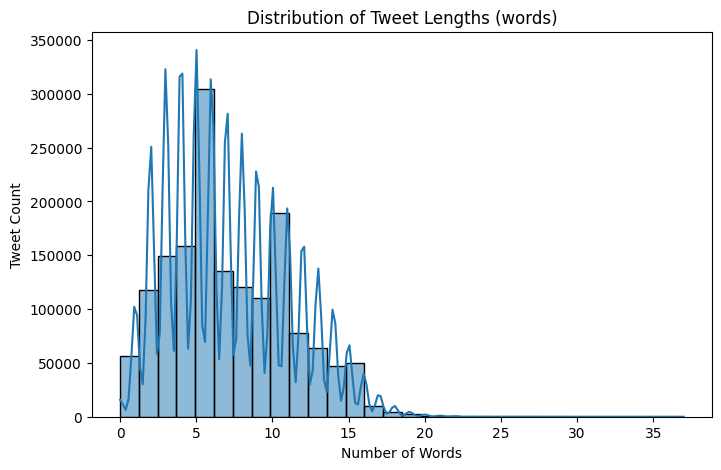

In [29]:
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='text_len', bins=30, kde=True)
plt.title("Distribution of Tweet Lengths (words)")
plt.xlabel("Number of Words")
plt.ylabel("Tweet Count")
plt.show()

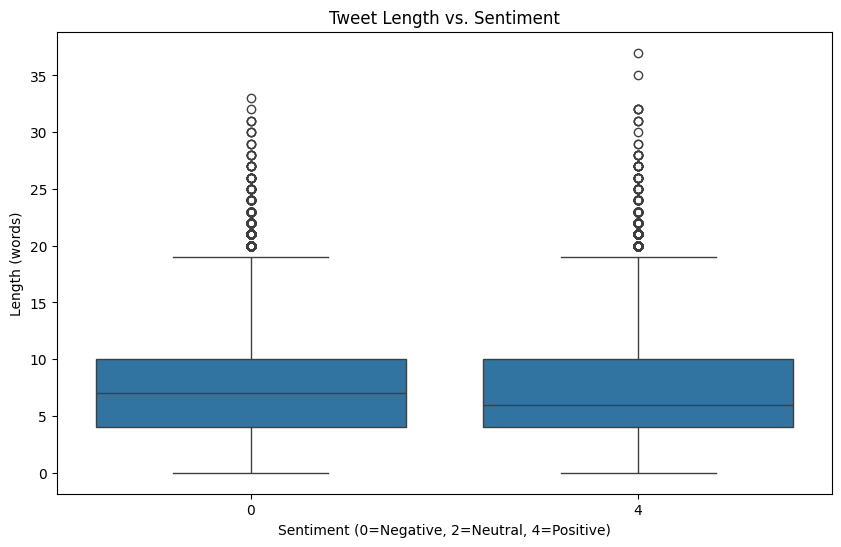

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='text_len')
plt.title("Tweet Length vs. Sentiment")
plt.xlabel("Sentiment (0=Negative, 2=Neutral, 4=Positive)")
plt.ylabel("Length (words)")
plt.show()

In [31]:
positive_tweets = df[df['target'] == 4]['clean_text']
negative_tweets = df[df['target'] == 0]['clean_text']

In [32]:
from collections import Counter

def get_top_n_words(text_series, n=20):
    all_words = " ".join(text_series).split()
    return Counter(all_words).most_common(n)

In [33]:
print("Top words in positive tweets:\n", get_top_n_words(positive_tweets))
print("\nTop words in negative tweets:\n", get_top_n_words(negative_tweets))

Top words in positive tweets:
 [('im', 74890), ('good', 60931), ('day', 53990), ('love', 49502), ('u', 38318), ('get', 38091), ('like', 37947), ('thanks', 33819), ('lol', 33510), ('time', 33210), ('going', 30652), ('go', 29811), ('today', 29213), ('got', 27801), ('one', 27565), ('new', 26645), ('know', 26396), ('see', 25584), ('great', 24892), ('well', 24584)]

Top words in negative tweets:
 [('im', 102670), ('day', 50085), ('get', 47839), ('go', 47633), ('work', 45569), ('dont', 44922), ('cant', 43606), ('like', 41150), ('today', 36896), ('want', 34031), ('going', 33450), ('got', 33101), ('back', 32592), ('miss', 31737), ('really', 31227), ('time', 30612), ('u', 29294), ('still', 28781), ('good', 28597), ('one', 28312)]


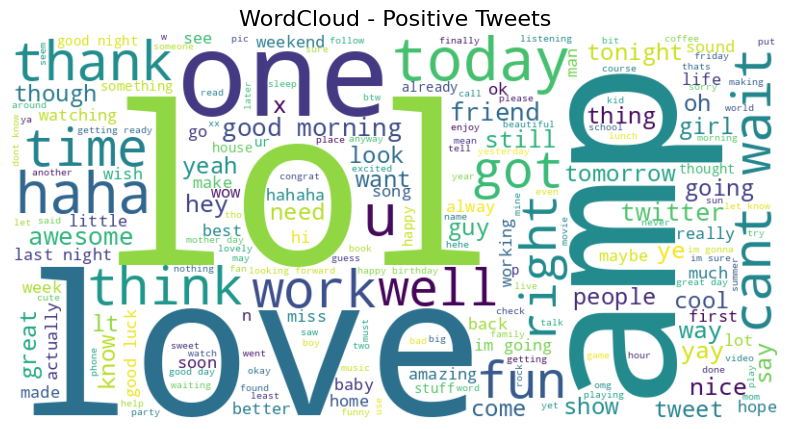

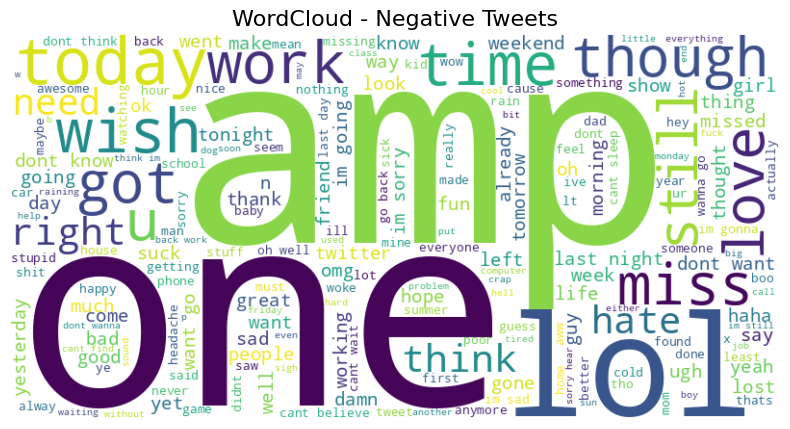

In [34]:
from wordcloud import WordCloud

def show_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

show_wordcloud(positive_tweets, "WordCloud - Positive Tweets")
show_wordcloud(negative_tweets, "WordCloud - Negative Tweets")

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

/tmp/ipython-input-36-2588347264.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pos, y='bigram', x='count', palette='Greens_r')


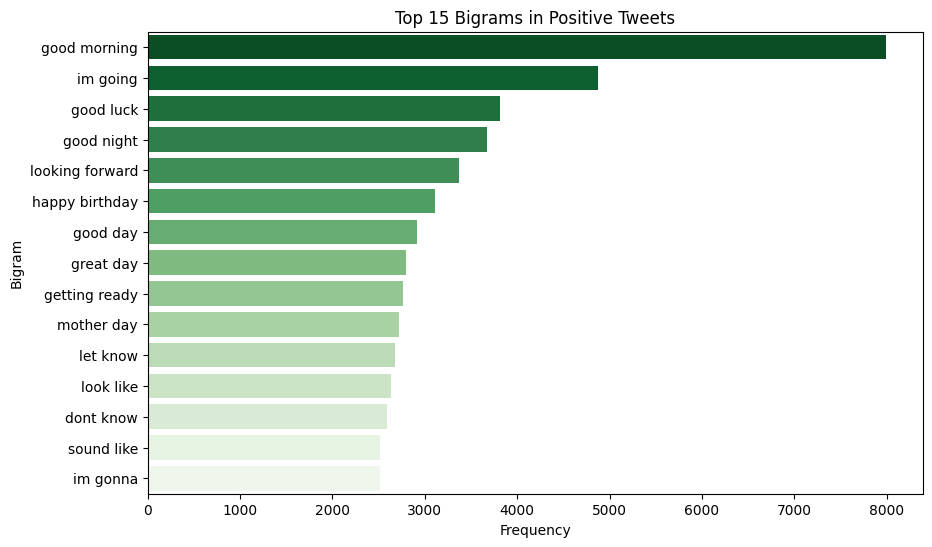

In [36]:
vectorizer_pos = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_pos = vectorizer_pos.fit_transform(positive_tweets)
bigrams_pos = vectorizer_pos.get_feature_names_out()
counts_pos = X_pos.sum(axis=0).A1

import pandas as pd
pos_bigrams_df = pd.DataFrame({'bigram': bigrams_pos, 'count': counts_pos})
top_pos = pos_bigrams_df.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_pos, y='bigram', x='count', palette='Greens_r')
plt.title("Top 15 Bigrams in Positive Tweets")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

/tmp/ipython-input-37-688148646.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_neg, y='bigram', x='count', palette='Reds_r')


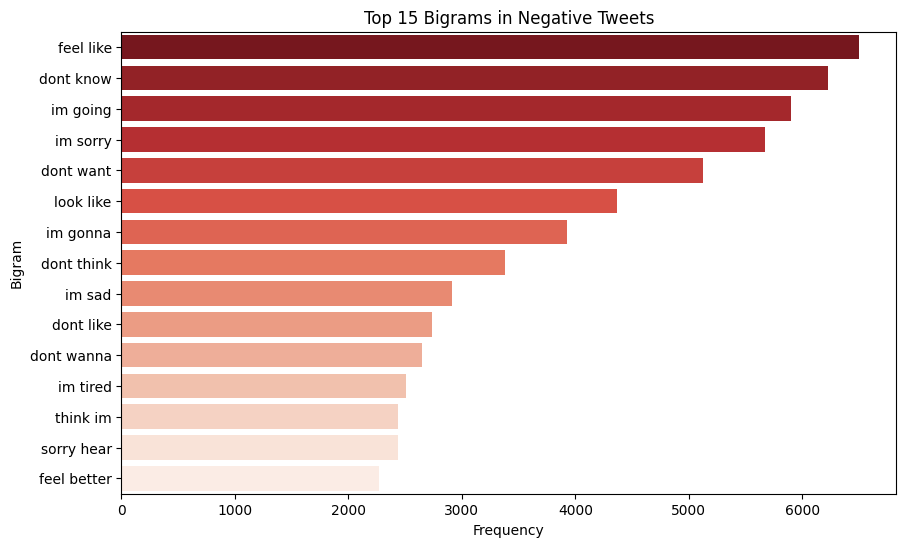

In [37]:
vectorizer_neg = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_neg = vectorizer_neg.fit_transform(negative_tweets)
bigrams_neg = vectorizer_neg.get_feature_names_out()
counts_neg = X_neg.sum(axis=0).A1

neg_bigrams_df = pd.DataFrame({'bigram': bigrams_neg, 'count': counts_neg})
top_neg = neg_bigrams_df.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_neg, y='bigram', x='count', palette='Reds_r')
plt.title("Top 15 Bigrams in Negative Tweets")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

/tmp/ipython-input-38-2763388220.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pos, y='bigram', x='count', palette='Greens_r')


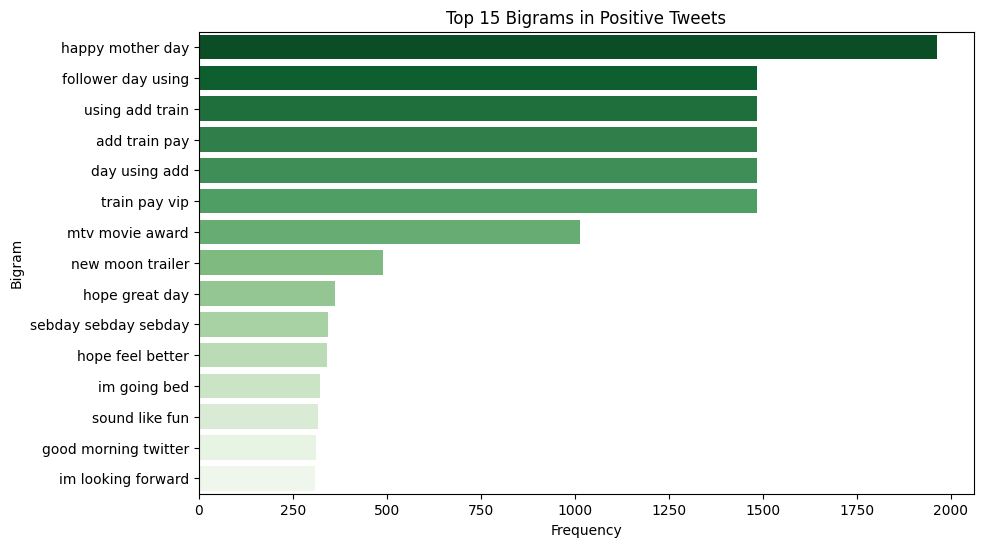

In [38]:
vectorizer_pos = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_pos = vectorizer_pos.fit_transform(positive_tweets)
bigrams_pos = vectorizer_pos.get_feature_names_out()
counts_pos = X_pos.sum(axis=0).A1

import pandas as pd
pos_bigrams_df = pd.DataFrame({'bigram': bigrams_pos, 'count': counts_pos})
top_pos = pos_bigrams_df.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_pos, y='bigram', x='count', palette='Greens_r')
plt.title("Top 15 Bigrams in Positive Tweets")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

/tmp/ipython-input-39-381229607.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_neg, y='bigram', x='count', palette='Reds_r')


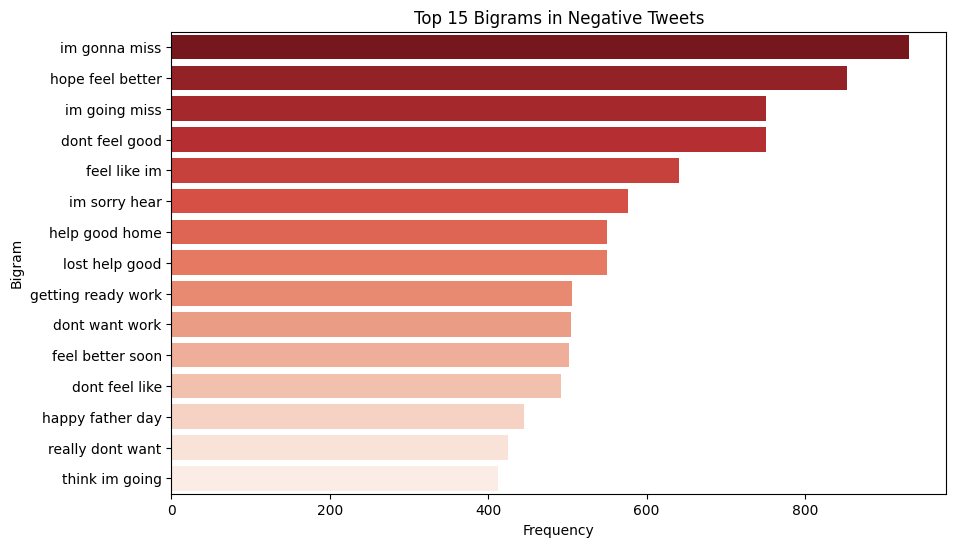

In [39]:
vectorizer_neg = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_neg = vectorizer_neg.fit_transform(negative_tweets)
bigrams_neg = vectorizer_neg.get_feature_names_out()
counts_neg = X_neg.sum(axis=0).A1

neg_bigrams_df = pd.DataFrame({'bigram': bigrams_neg, 'count': counts_neg})
top_neg = neg_bigrams_df.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_neg, y='bigram', x='count', palette='Reds_r')
plt.title("Top 15 Bigrams in Negative Tweets")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

In [54]:
df[['clean_text', 'target']].to_csv('cleaned_tweets.csv', index=False)

In [74]:
from google.colab import files
files.download('cleaned_tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
df = pd.read_csv("cleaned_tweets.csv")
df['target'] = df['target'].map({0: 0, 4: 1})

In [68]:
X = df['clean_text'].astype(str)
y = df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [69]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [70]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.79463125

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79    160000
           1       0.78      0.82      0.80    160000

    accuracy                           0.79    320000
   macro avg       0.80      0.79      0.79    320000
weighted avg       0.80      0.79      0.79    320000



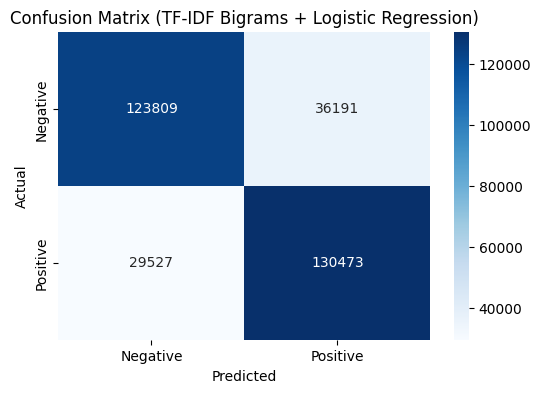

In [71]:
y_pred = model.predict(X_val_tfidf)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (TF-IDF Bigrams + Logistic Regression)')
plt.show()

Naive Bayes Accuracy: 0.776959375

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.78      0.77      0.78    160000
           1       0.78      0.78      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



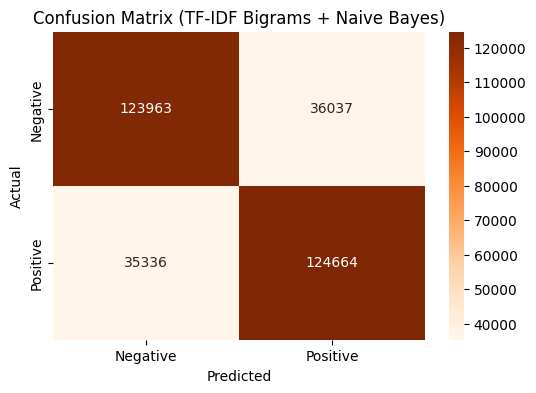

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_val_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_val, nb_pred))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_val, nb_pred))

cm_nb = confusion_matrix(y_val, nb_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (TF-IDF Bigrams + Naive Bayes)')
plt.show()

SVM Accuracy: 0.7911375

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.81      0.77      0.79    160000
           1       0.78      0.81      0.80    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



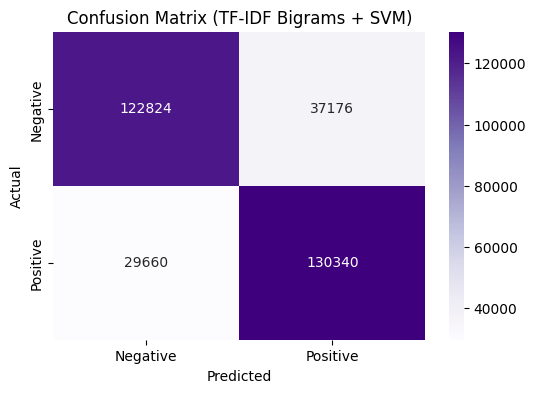

In [73]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_val_tfidf)

print("SVM Accuracy:", accuracy_score(y_val, svm_pred))
print("\nClassification Report (SVM):\n", classification_report(y_val, svm_pred))

cm_svm = confusion_matrix(y_val, svm_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (TF-IDF Bigrams + SVM)')
plt.show()

In [76]:
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

joblib.dump(model, 'logistic_regression_model.pkl')

joblib.dump(nb_model, 'naive_bayes_model.pkl')

joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [79]:
from google.colab import files

files.download('tfidf_vectorizer.pkl')
files.download('logistic_regression_model.pkl')
files.download('naive_bayes_model.pkl')
files.download('svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>